# Ungraded Lab: MNIST Deep Autoencoder

Welcome back! In this lab, you will extend the shallow autoencoder you built in the previous exercise. The model here will have a deeper network so it can handle more complex images.

## Imports

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

## Prepare the Dataset

You will prepare the MNIST dataset just like in the previous lab.

In [ ]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [ ]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.CE3H4E_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.CE3H4E_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Build the Model

As mentioned, you will have a deeper network for the autoencoder. Compare the layers here with that of the shallow network you built in the previous lab.

In [ ]:
def deep_autoencoder(inputs):
  '''Builds the encoder and decoder using Dense layers.'''
  encoder = tf.keras.layers.Dense(units=128, activation='relu')(inputs)
  encoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(encoder)

  decoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  decoder = tf.keras.layers.Dense(units=128, activation='relu')(decoder)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(decoder)

  return encoder, decoder

# set the input tensor
inputs =  tf.keras.Input(shape=(784,))

# get the encoder and decoder output
deep_encoder_output, deep_autoencoder_output = deep_autoencoder(inputs)

# setup the encoder because you will visualize its output later
deep_encoder_model = tf.keras.Model(inputs=inputs, outputs=deep_encoder_output)

# setup the autoencoder
deep_autoencoder_model = tf.keras.Model(inputs=inputs, outputs=deep_autoencoder_output)

## Compile and Train the Model

In [ ]:

train_steps = 60000 // BATCH_SIZE

deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.2773
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1356
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1192
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1117
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1055
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1010
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0982
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0961
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0946
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0933
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0919
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0910
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0901
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0895
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7

## Display sample results

See the results using the model you just trained.

In [ ]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


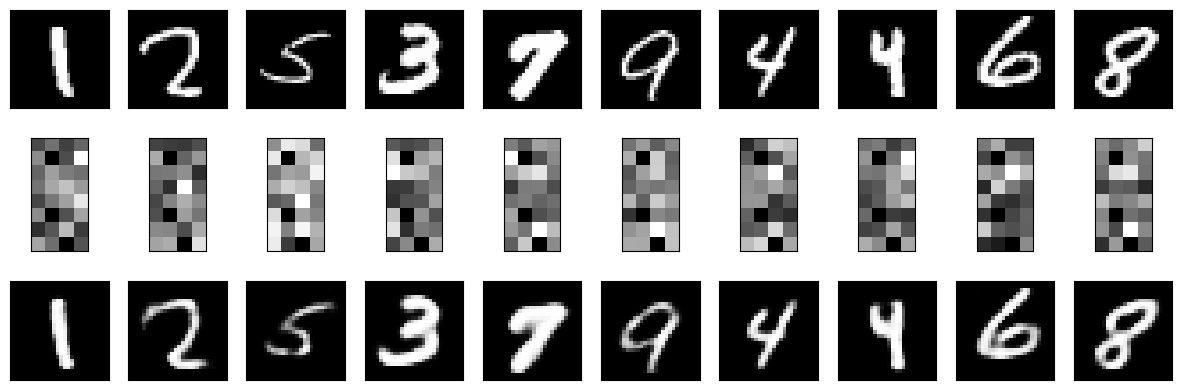

In [ ]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = deep_encoder_model.predict(test_dataset)

# get a prediction for the test batch
deep_predicted = deep_autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])